In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [124]:
data = pd.read_csv('data/run-wint2017-summ2018.csv', delimiter=",")

#Only keep activities that are running
data = data[data.type == "Run"]

#Delete previous activities
data = data.drop(data.index[:15])

#Convert meters to km
data['distance'] = data['distance'].apply(lambda x: x * (10 ** -3))

#Convert seconds to minutes
data['elapsed_time'] = data['elapsed_time'].apply(lambda x: x / 60)

#Convert time from "11-05-2016  15:38:00" to a datetime object
data['date'] = data['date'].apply(lambda x: dt.datetime.strptime(x,'%d-%m-%y %H:%M').date())

In [125]:
def lineplot(x_data, y_data, z_data, x_label, y_label, z_label, title):
    fig, ax = plt.subplots()
    plt.plot(x_data, y_data, color="orange", lw=2, linestyle="-")
    fig.set_size_inches(18, 8)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    if not z_data.empty:
        plt.plot(x_data, z_data, color="purple", lw=2, linestyle="-")
        plt.legend([y_label, z_label])
        plt.xlabel("")
        plt.ylabel("")

    plt.show()

In [126]:
def scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    plt.scatter(x_data, y_data)
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()

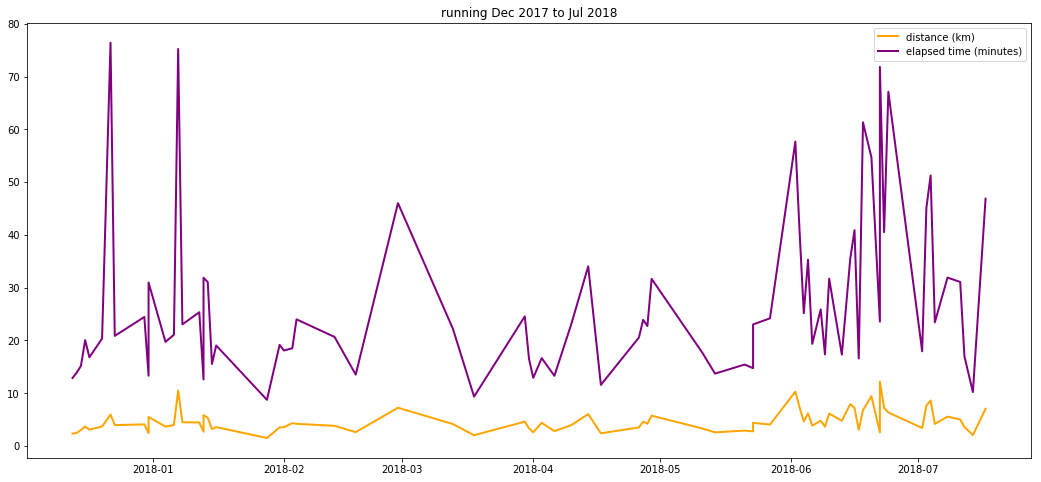

In [127]:
lineplot(data['date'], data['distance'], data['elapsed_time'], "", "distance (km)", "elapsed time (minutes)", "running Dec 2017 to Jul 2018")

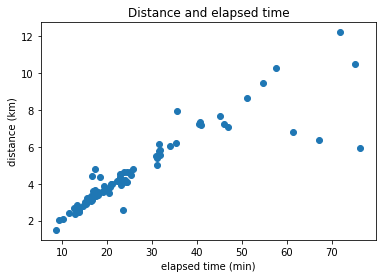

In [128]:
scatterplot(data.elapsed_time, data.distance, "elapsed time (min)", "distance (km)", "Distance and elapsed time")

In [129]:
#Correlation between distance and elapsed time
data.distance.corr(data.elapsed_time)

0.8925735210358935